# Data Preprocessing on Titanic dataset

Steps for data preprocessing :

### a.  Data Collection

1. Collect the dataset [Kaggle : https://www.kaggle.com/datasets/yasserh/titanic-dataset]
        
### b.  Data Preprocessing
    1. Import the Libraries.
    2. Importing the dataset.
    3. Checking for Null Values.
    4. Data Visualization.
    5. Outlier Detection.
    6. Splitting Dependent and Independent variables.
    7. Perform Encoding.
    8. Feature Scaling.
    9. Splitting Data into Train and Test.

#### 1. Import the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 2. Importing the dataset

In [2]:
df = pd.read_csv("Titanic-Dataset.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [8]:
df.corr().Fare.sort_values(ascending=False)

Fare           1.000000
Survived       0.257307
Parch          0.216225
SibSp          0.159651
Age            0.096067
PassengerId    0.012658
Pclass        -0.549500
Name: Fare, dtype: float64

In [9]:
df.shape

(891, 12)

#### 3. Checking for Null Values

In [10]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Handling null values

In [12]:
# Handling null values in 'Age' by imputing with median

median_age = df['Age'].median()

In [13]:
df['Age'].fillna(median_age, inplace=True)

In [14]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
# Handling null values in 'Cabin' by creating a new category 'Unknown'

df['Cabin'].fillna('Unknown', inplace=True)

In [16]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [17]:
unknown_count = (df['Cabin'] == 'Unknown').sum()
print(f"Number of 'Unknown' values in the 'Cabin' column: {unknown_count}") # checking whether null values are replaced with unknown.

Number of 'Unknown' values in the 'Cabin' column: 687


In [18]:
# Handling missing values in 'Embarked' by dropping rows

df = df.dropna(subset=['Embarked'])

In [19]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [20]:
df.Pclass.nunique()

3

In [21]:
df.Pclass.unique()

array([3, 1, 2], dtype=int64)

In [22]:
df.Pclass.value_counts()

3    491
1    214
2    184
Name: Pclass, dtype: int64

#### 4. Data Visualization

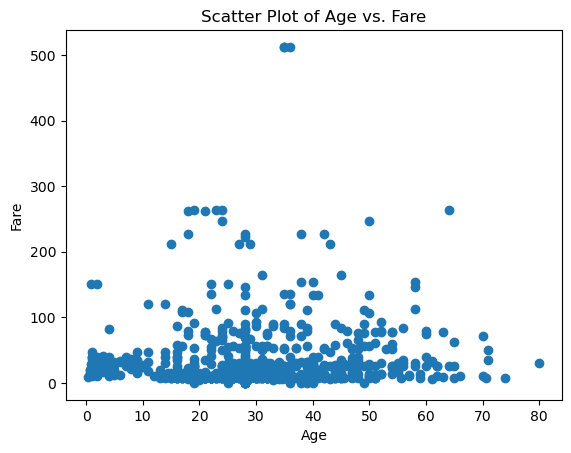

In [23]:
plt.scatter(df['Age'], df['Fare'])

plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatter Plot of Age vs. Fare')

plt.show()

<AxesSubplot:>

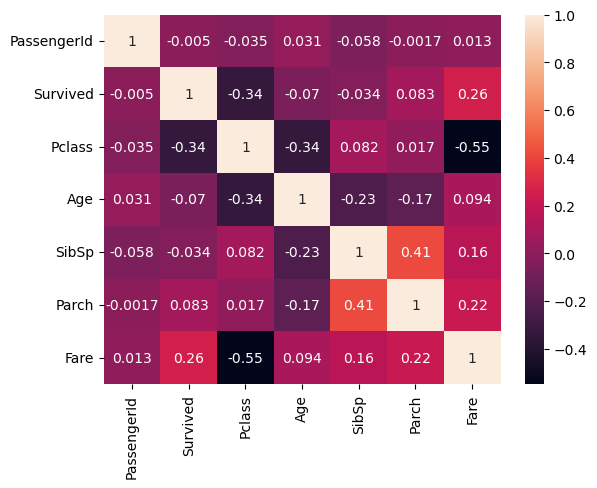

In [24]:
sns.heatmap(df.corr(),annot=True)

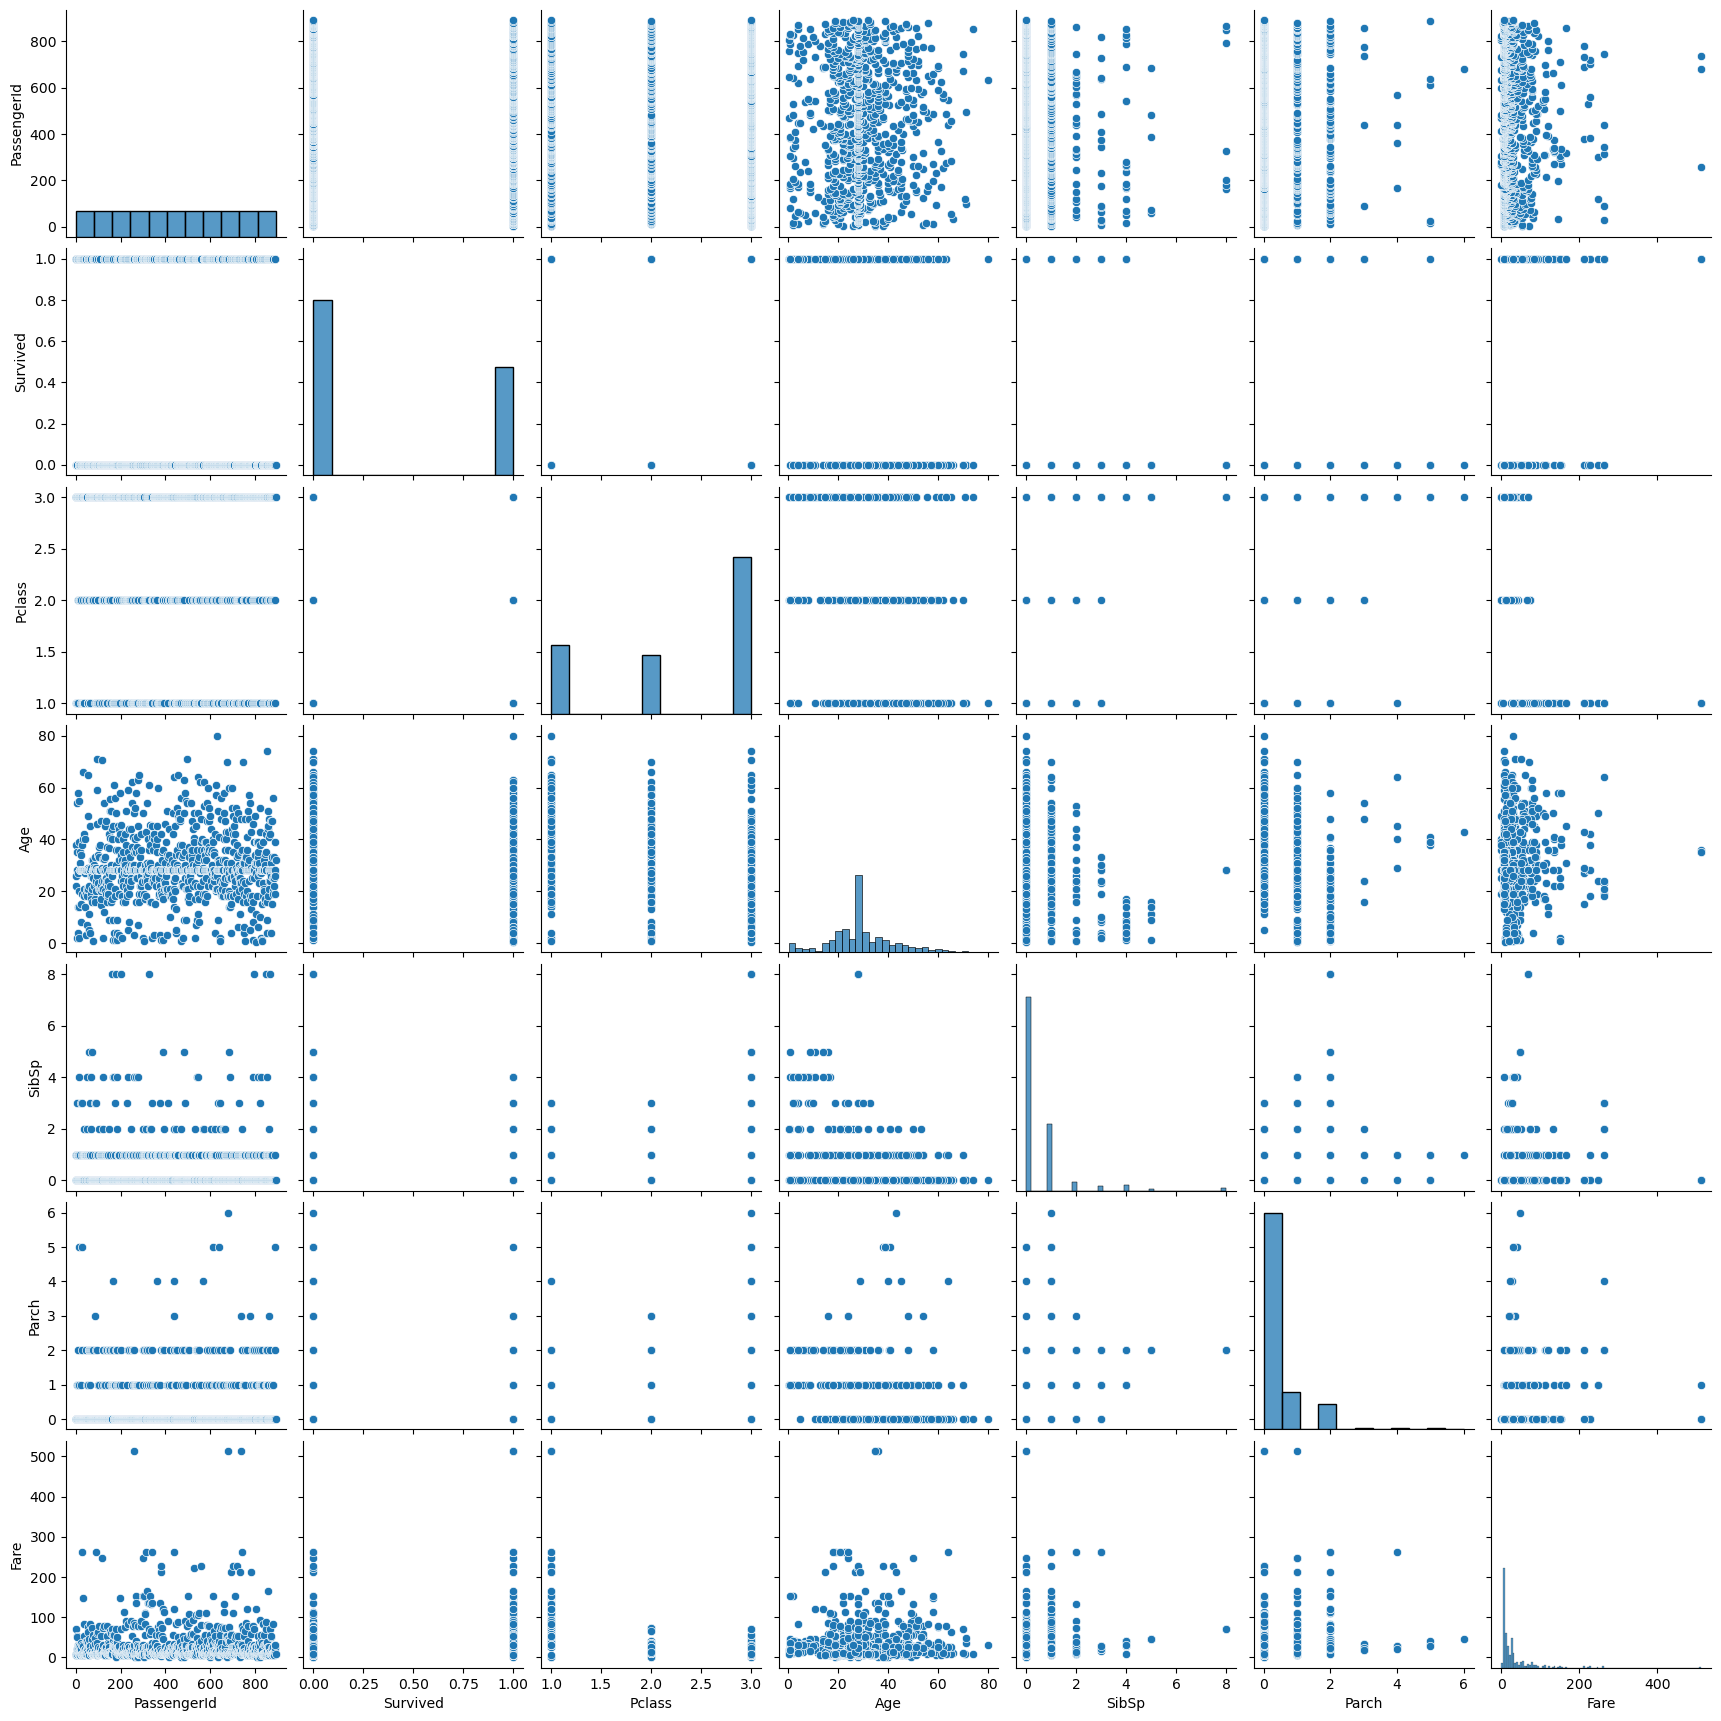

In [25]:
sns.pairplot(df)

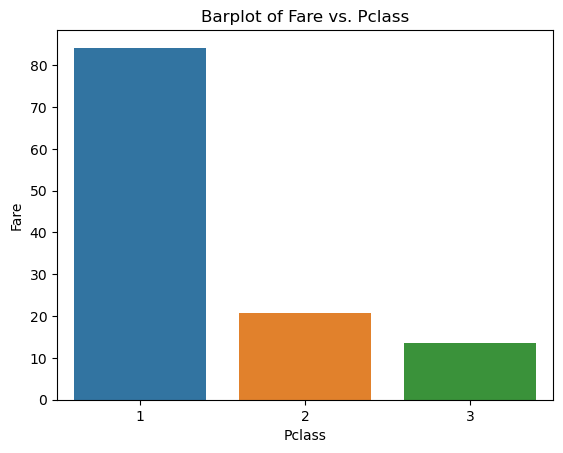

In [26]:
sns.barplot(x=df['Pclass'],y=df['Fare'],ci=0)

plt.xlabel("Pclass")
plt.ylabel("Fare")
plt.title("Barplot of Fare vs. Pclass")

plt.show()

#### 5. Outlier Detection

In [27]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S


In [28]:
df.shape

(889, 12)

#### outlier removal using IQR

In [29]:
# Fare

C:\Users\LalithaK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

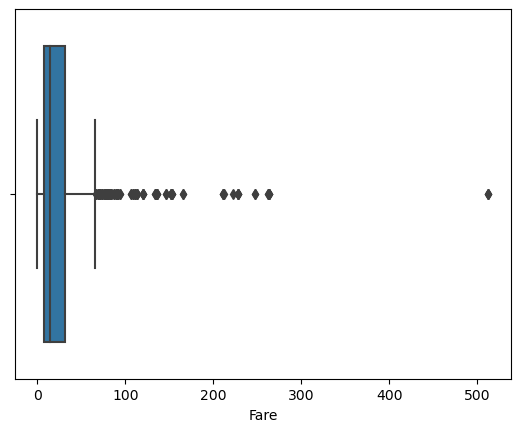

In [30]:
sns.boxplot(df.Fare)

In [31]:
q1 = df.Fare.quantile(0.25)
q3 = df.Fare.quantile(0.75)
IQR = q3-q1
upper_limit = q3+1.5*IQR 
lower_limit = q1-1.5*IQR

In [32]:
df['Fare']=np.where(df['Fare']>upper_limit,upper_limit,np.where(df['Fare']<lower_limit,lower_limit,df['Fare']))

C:\Users\LalithaK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

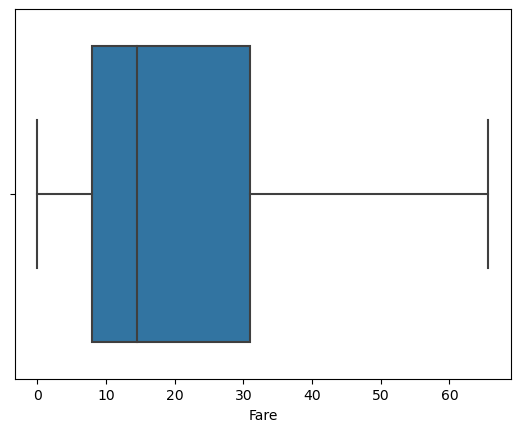

In [33]:
sns.boxplot(df.Fare)

In [34]:
# Age

C:\Users\LalithaK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

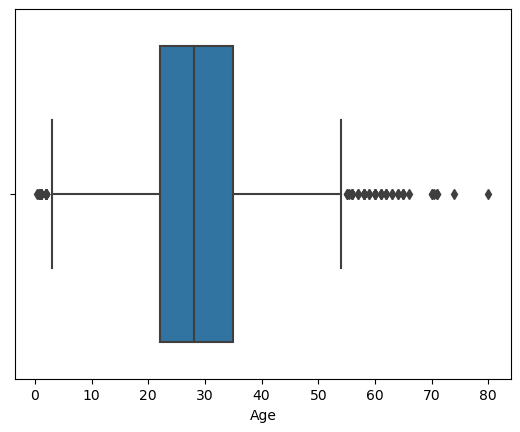

In [35]:
sns.boxplot(df.Age)

In [36]:
q1 = df.Age.quantile(0.25)
q3 = df.Age.quantile(0.75)
IQR = q3-q1
upper_limit = q3+1.5*IQR 
lower_limit = q1-1.5*IQR

In [37]:
df['Age']=np.where(df['Age']>upper_limit,upper_limit,np.where(df['Age']<lower_limit,lower_limit,df['Age']))

C:\Users\LalithaK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

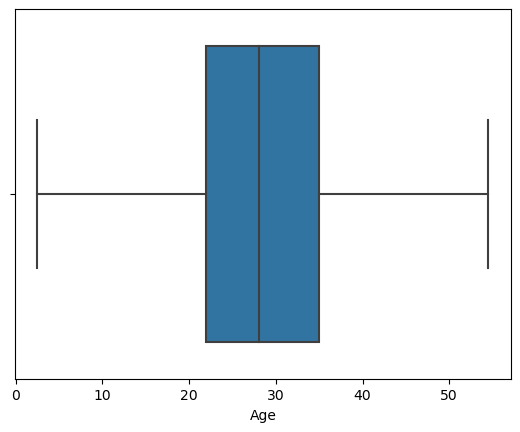

In [38]:
sns.boxplot(df.Age)

#### 6. Splitting Dependent and Independent variables

In [39]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,65.6563,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S


In [59]:
# independent variables (X) should be 2d array of dataframe

X = df.drop(columns=['PassengerId','Name','Survived','Ticket','Cabin'],axis=1)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,65.6563,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [60]:
X.shape

(889, 7)

In [61]:
type(X)

pandas.core.frame.DataFrame

In [62]:
y = df['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

#### 7. Encoding

In [63]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,65.6563,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [64]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [65]:
# Embark

In [66]:
X['Embarked'] = le.fit_transform(X['Embarked'])

In [67]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,2
1,1,female,38.0,1,0,65.6563,0
2,3,female,26.0,0,0,7.9250,2
3,1,female,35.0,1,0,53.1000,2
4,3,male,35.0,0,0,8.0500,2


In [68]:
print(le.classes_)

['C' 'Q' 'S']


In [69]:
mapping = dict(zip(le.classes_,range(len(le.classes_))))
mapping

{'C': 0, 'Q': 1, 'S': 2}

In [70]:
# Sex

In [71]:
X['Sex'] = le.fit_transform(X['Sex'])

In [72]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,65.6563,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [73]:
print(le.classes_)

['female' 'male']


In [74]:
mapping1 = dict(zip(le.classes_,range(len(le.classes_))))
mapping1

{'female': 0, 'male': 1}

#### 8. Feature Scaling

In [75]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

In [76]:
x_scaled = pd.DataFrame(ms.fit_transform(X),columns=X.columns)

In [77]:
x_scaled.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,1.0,0.375000,0.125,0.0,0.110424,1.0
1,0.0,0.0,0.682692,0.125,0.0,1.000000,0.0
2,1.0,0.0,0.451923,0.000,0.0,0.120704,1.0
3,0.0,0.0,0.625000,0.125,0.0,0.808757,1.0
4,1.0,1.0,0.625000,0.000,0.0,0.122608,1.0


#### 9. Train, Test & Split

In [78]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size =0.2,random_state =0)

In [79]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(711, 7) (178, 7) (711,) (178,)
